In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your CSV
CSV_PATH = "session_metrics.csv"

df = pd.read_csv(CSV_PATH)
df["ts"] = pd.to_datetime(df["ts"], errors="coerce")
df = df.sort_values("ts").reset_index(drop=True)

# Basic sanity
display(df.tail(3))
print(f"Rows: {len(df)}, sessions: {df['session_id'].nunique()}")

,session_id,ts,avg_faithfulness,avg_helpfulness,turns_scored,avg_latency_ms_total,avg_latency_ms_retrieval,avg_latency_ms_llm,retrieval_success_rate_pct,grounded_in_patient_rate_pct,helpbook_cite_rate_pct,fallback_rate_pct,empty_context_rate_pct,avg_context_chars,avg_answer_chars,avg_retrieved_docs_patient,avg_retrieved_docs_helpbook,hallucination_rate_pct,patient_index,general_index
0,38a17fa5-6f7f-4b89-93ce-f8e077158040,2025-08-14 15:39:04,0.50,1.0,2,7997.05,5266.05,2731.00,100.0,50.0,50.0,0.0,0.0,13145.50,577.50,10.0,6.0,0.0,patient-reports,medical-helpbook
1,8b63c1a1-2a32-4748-95ff-4215ea34832c,2025-08-14 16:59:09,1.00,0.5,2,19024.95,6112.70,12912.25,100.0,100.0,0.0,0.0,0.0,13170.00,494.00,10.0,6.0,0.0,patient-reports,medical-helpbook
2,8427dc24-f157-441d-b539-d191a96a97fe,2025-08-19 14:21:19,0.75,0.5,4,13106.33,10758.90,2347.43,100.0,100.0,0.0,0.0,0.0,11769.75,631.75,10.0,6.0,0.0,patient-reports,medical-helpbook


Rows: 3, sessions: 3


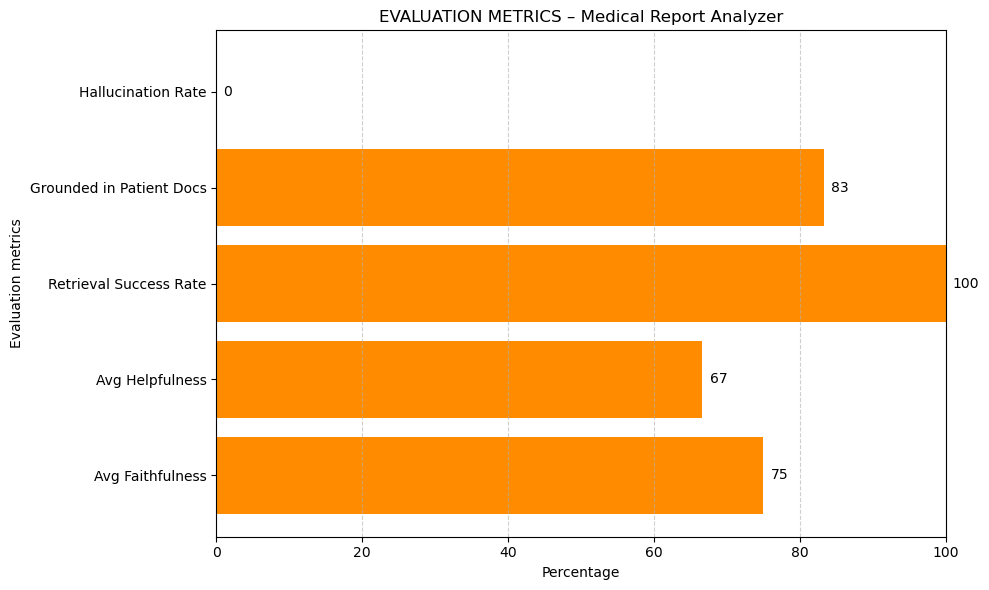

In [11]:
# Compute averages for each metric
metrics_avg = {
    "Avg Faithfulness": df["avg_faithfulness"].mean() * 100,
    "Avg Helpfulness": df["avg_helpfulness"].mean() * 100,
    "Retrieval Success Rate": df["retrieval_success_rate_pct"].mean(),
    "Grounded in Patient Docs": df["grounded_in_patient_rate_pct"].mean(),
    "Hallucination Rate": df["hallucination_rate_pct"].mean(),
}

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(list(metrics_avg.keys()), list(metrics_avg.values()), color="darkorange")

# Annotate bars with values
for bar in bars:
    plt.text(
        bar.get_width() + 1,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.0f}",
        va="center",
        fontsize=10,
    )

plt.xlim(0, 100)
plt.xlabel("Percentage")
plt.ylabel("Evaluation metrics")
plt.title("EVALUATION METRICS – Medical Report Analyzer")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

In [12]:
LAST_N = None   # set to an int (e.g., 50) to limit to most recent N sessions

sub = df.tail(LAST_N) if LAST_N else df.copy()

kpis = {
    "Avg faithfulness": sub["avg_faithfulness"].mean(),
    "Avg helpfulness": sub["avg_helpfulness"].mean(),
    "Avg total latency (ms)": sub["avg_latency_ms_total"].mean(),
    "Retrieval success (%)": sub["retrieval_success_rate_pct"].mean(),
    "Grounded in [patient] (%)": sub["grounded_in_patient_rate_pct"].mean(),
    "Hallucination rate (%)": sub["hallucination_rate_pct"].mean(),
}
pd.Series(kpis).round(2)

Avg faithfulness                 0.75
Avg helpfulness                  0.67
Avg total latency (ms)       13376.11
Retrieval success (%)          100.00
Grounded in [patient] (%)       83.33
Hallucination rate (%)           0.00
dtype: float64

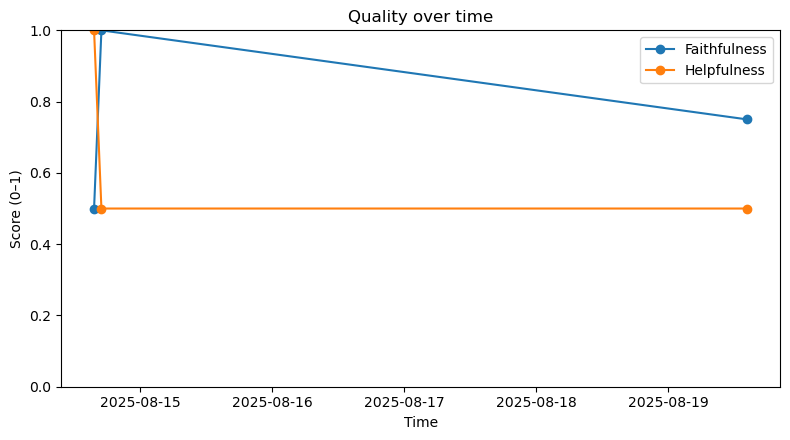

In [3]:
plt.figure(figsize=(8,4.5))
plt.plot(df["ts"], df["avg_faithfulness"], marker="o", label="Faithfulness")
plt.plot(df["ts"], df["avg_helpfulness"], marker="o", label="Helpfulness")
plt.ylim(0, 1)
plt.xlabel("Time"); plt.ylabel("Score (0–1)"); plt.title("Quality over time"); plt.legend()
plt.tight_layout(); plt.show()

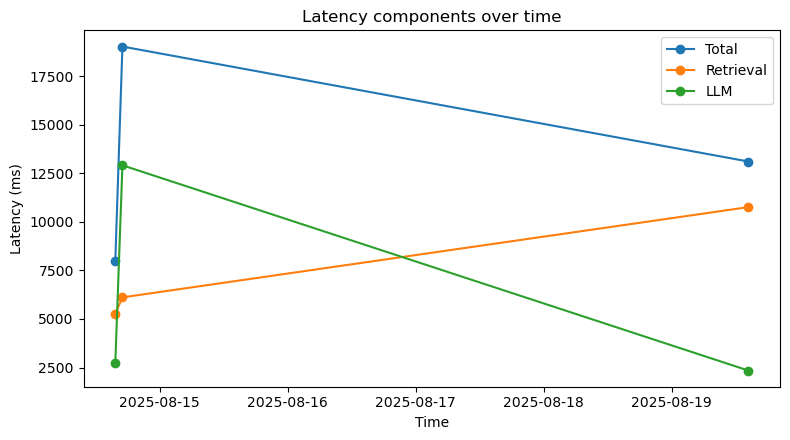

In [4]:
plt.figure(figsize=(8,4.5))
plt.plot(df["ts"], df["avg_latency_ms_total"], marker="o", label="Total")
plt.plot(df["ts"], df["avg_latency_ms_retrieval"], marker="o", label="Retrieval")
plt.plot(df["ts"], df["avg_latency_ms_llm"], marker="o", label="LLM")
plt.xlabel("Time"); plt.ylabel("Latency (ms)"); plt.title("Latency components over time"); plt.legend()
plt.tight_layout(); plt.show()